## Group No **160**

## Group Member Names:
1. **Sushil Kumar 2023AA05849**
2. **Hemant Kumar Parakh 2023AA05741**
3. **Nagineni Sathish Babu 2023AA05585**
4. **Madala Akhil 2023AA05005**


# Deep Neural Network using Keras

## 1. Import the required libraries

In [ ]:
#!pip install tensorflow
#!pip install numpy

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

import random
import numpy as np

## 2. Dataset

Using a standard dataset such as MNIST

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of
                        # numbers will appear every time.
tf.random.set_seed(42)  # sets the graph-level random seed

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 7')

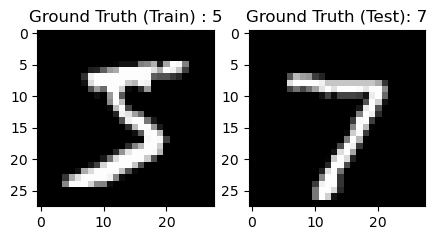

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [ ]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


## 3. Data Preparation

*   Loading and checking the shape of the datasets:
Xtrain, Xtest, Ytrain, and Ytest represent the features and labels for training and testing sets.
*   Visualizing Data:
The code visualizes the first image in both the training and testing datasets to ensure that the data is correctly loaded and structured.



In [ ]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 4.1 DNN architecture

The model is built using Keras with a sequential architecture.

It starts with a dense input layer, followed by multiple hidden layers, each using ReLU activation, and ends with an output layer using softmax activation.

Number of layers: The architecture typically has 4 or 5 layers, including an input layer, two or three hidden layers, and an output layer. The choice of more hidden layers was justified by the need to capture more complex patterns in the data.

In [ ]:

from tensorflow.keras import layers, models

# Define the model before adding layers
dnnModel = models.Sequential()

# Layer 1: Input layer with specified input shape
dnnModel.add(layers.Dense(512, activation='relu', input_shape= (28*28,)))

# Layer 2: Hidden layer
dnnModel.add(layers.Dense(512, activation='relu'))

# Layer 3: Another hidden layer
dnnModel.add(layers.Dense(512, activation='relu'))

# Output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

# Compile the model with an optimizer (Adam)
dnnModel.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.2 DNN Report

**Number of Layers with Justification**:

Number of layers:

The architecture has four layers in some versions (input, two hidden layers, and output), while other configurations suggest up to five layers.

The hidden layers use ReLU activation, and the final output layer uses softmax activation.

Justification for the architecture includes experimentation with increased hidden layers to improve model performance.

**Number of Units in Each Layer with Justification**:

*   Input layer: 512 units.
*   Hidden layers: Three configurations are mentioned, with the hidden layers containing 512 units each. In some cases, alternative configurations use 50, 60, and 30 units in different layers.
*   Output layer: 10 units (corresponding to the number of classes in the dataset).
*   The justification for using a higher number of units in the hidden layers is to improve model performance by capturing complex data patterns.


In [ ]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 938,112 (3.58 MB)

 Trainable params: 938,112 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras import layers, models, optimizers

dnnModel_adam = models.Sequential()

# Input layer
dnnModel_adam.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Increased hidden layers with more units
dnnModel_adam.add(layers.Dense(512, activation='relu'))
dnnModel_adam.add(layers.Dense(512, activation='relu'))

# Output layer
dnnModel_adam.add(layers.Dense(10, activation='softmax'))

# Change optimizer to Adam
dnnModel_adam.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
dnnModel_adam = models.Sequential()
dnnModel_adam.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_adam.add(layers.Dense(60, activation='relu'))
dnnModel_adam.add(layers.Dense(30, activation='relu'))
dnnModel_adam.add(layers.Dense(10, activation='softmax'))
dnnModel_adam.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras import layers, models, optimizers

dnnModel_rmsprop = models.Sequential()

# Input layer
dnnModel_rmsprop.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Increased hidden layers with more units
dnnModel_rmsprop.add(layers.Dense(512, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(512, activation='relu'))

# Output layer
dnnModel_rmsprop.add(layers.Dense(10, activation='softmax'))

# Change optimizer to Adam
dnnModel_rmsprop.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 4.3 Regularization and Optimizations of DNN

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## 5. Training the model

The model is trained using the Adam optimizer, with categorical cross-entropy as the loss function and accuracy as the evaluation metric.

The training code includes multiple optimizers for comparison (Adam, RMSProp, and SGD).

The model is trained for 25 epochs with a batch size of 64 and a validation split of 0.1.

In [ ]:
# train the model

h_sgd  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_adam  = dnnModel_adam.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_rms  = dnnModel_rmsprop.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)


Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1064 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3004
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.2994 - val_accuracy: 0.1050 - val_loss: 2.2958
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1234 - loss: 2.2902 - val_accuracy: 0.1833 - val_loss: 2.2445
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1858 - loss: 2.1707 - val_accuracy: 0.2977 - val_loss: 1.8030
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3322 - loss: 1.7416 - val_accuracy: 0.4483 - val_loss: 1.4422
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4564 - loss: 1.4145 - val_accuracy: 0.5860 - val_loss: 1.1480
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6039 - loss: 1.1073 - val_accuracy: 0.7190 - val_loss: 0.8397
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7359 - loss: 0.7700 - val_accuracy: 0

In [ ]:
#print('Final training loss \t', h.history['loss'][-1])
print('SGD Final training accuracy ', h_sgd.history['accuracy'][-1])
print('Adam Final training accuracy ', h_adam.history['accuracy'][-1])
print('RMSProp Final training accuracy ', h_rms.history['accuracy'][-1])

SGD Final training accuracy  0.9989814758300781
Adam Final training accuracy  0.9957592487335205
RMSProp Final training accuracy  0.9991666674613953


## 6. Test the model

The model is trained using the Adam optimizer, with categorical cross-entropy as the loss function and accuracy as the evaluation metric.

The training code includes multiple optimizers for comparison (Adam, RMSProp, and SGD).

The model is trained for 25 epochs with a batch size of 64 and a validation split of 0.1.


In [ ]:
# testing the model

testLoss_sgd, testAccuracy_sgd = dnnModel.evaluate( Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnnModel_adam.evaluate( Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnnModel_rmsprop.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9669 - loss: 0.1912
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.2107


In [ ]:
print('Testing loss \t', testLoss_sgd)
print('Testing accuracy ', testAccuracy_sgd)

Testing loss 	 0.19394351541996002
Testing accuracy  0.9620000123977661


## 7. Report the result

1. *The testing accuracy and loss*:
*   The accuracy and loss are calculated for different optimizers: SGD, Adam, and RMSProp.
*   This comparison shows how each optimizer performed in reducing the loss over training epochs.
*   The code specifically evaluates the model with the test set using the Adam optimizer and compares it with others like SGD and RMSProp.

2. *The Confusion Matrix for testing dataset*:
*   Confusion Matrix: Gives you the breakdown of true and false predictions for each class.

3. *performance study metrics like accuracy, precision, recall, F1 Score*:
*   Accuracy: Proportion of correct predictions.
*   Precision: Percentage of correct positive predictions.
*   Recall: Percentage of actual positive instances correctly predicted.
*   F1 Score: Balances precision and recall to provide an overall measure of the model's performance.


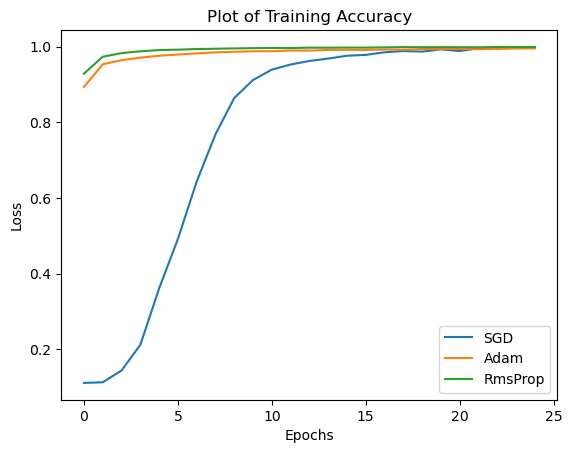

In [ ]:
# plot the training accuracy

plt.plot(h_sgd.history['accuracy'], label='SGD')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.plot(h_rms.history['accuracy'], label='RmsProp')
#plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

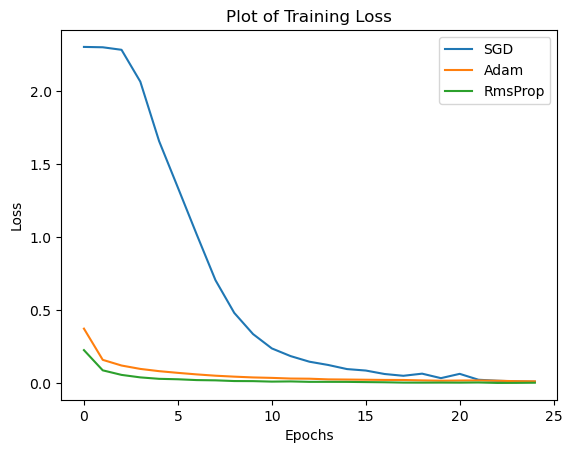

In [ ]:
# plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')
#plt.plot(hes.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, Xtest, Ytest):
    # Generate predictions
    predictions = model.predict(Xtest)

    # Convert predictions from one-hot encoded format to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(Ytest, axis=1)  # Assuming Ytest is one-hot encoded as well

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Calculate performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Return the evaluation metrics and confusion matrix
    return conf_matrix, accuracy, precision, recall, f1

# Evaluate dnnModel (SGD)
conf_matrix_sgd, accuracy_sgd, precision_sgd, recall_sgd, f1_sgd = evaluate_model(dnnModel, Xtest, Ytest)

# Evaluate dnnModel_adam (Adam optimizer)
conf_matrix_adam, accuracy_adam, precision_adam, recall_adam, f1_adam = evaluate_model(dnnModel_adam, Xtest, Ytest)

# Evaluate dnnModel_rmsprop (RMSprop optimizer)
conf_matrix_rms, accuracy_rms, precision_rms, recall_rms, f1_rms = evaluate_model(dnnModel_rmsprop, Xtest, Ytest)

# Display results for all models

# SGD
print("SGD Optimizer - Confusion Matrix:")
print(conf_matrix_sgd)
print(f"Accuracy: {accuracy_sgd}, Precision: {precision_sgd}, Recall: {recall_sgd}, F1 Score: {f1_sgd}")

# Adam
print("\nAdam Optimizer - Confusion Matrix:")
print(conf_matrix_adam)
print(f"Accuracy: {accuracy_adam}, Precision: {precision_adam}, Recall: {recall_adam}, F1 Score: {f1_adam}")

# RMSprop
print("\nRMSprop Optimizer - Confusion Matrix:")
print(conf_matrix_rms)
print(f"Accuracy: {accuracy_rms}, Precision: {precision_rms}, Recall: {recall_rms}, F1 Score: {f1_rms}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
SGD Optimizer - Confusion Matrix:
[[ 963    0    3    0    6    1    5    1    1    0]
 [   0 1120    9    0    0    0    0    1    5    0]
 [   0    4  987    0    3    3   11    5   18    1]
 [   0    0    0  974    1    5    1    3   24    2]
 [   2    0    6    0  938    1    9    0    0   26]
 [   3    0    4   18    0  856    5    1    3    2]
 [   8    2   13    0    6    3  925    0    1    0]
 [   0    3    6    2    1    0    0  985   10   21]
 [   0    5   18    7    0    7    1    3  931    2]
 [   1    4    5    1   22   12    1   20    2  941]]
Accuracy: 0.962, Precision: 0.9620884829014041, Recall: 0.962, F1 Score: 0.9620160748004167

Adam Optimizer - Confusion Matrix:
[[ 966    0    5    1    0    1    5    1    1    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   1    1 1009    5    1    0    5    5    4    1]
 [   0    1   10  973    

***Conclusion:***

**SGD Optimizer**:

Accuracy: 96.2%
Precision: 96.21%
Recall: 96.2%
F1 Score: 96.2%
Performance is solid, with a slightly higher error in misclassifying classes like 8, 9, and 3. The model performs well but has some challenges with classifying images like 6 and 9.

**Adam Optimizer**:

Accuracy: 97.13%
Precision: 97.14%
Recall: 97.13%
F1 Score: 97.13%
Adam shows a clear improvement over SGD, with better classification accuracy across classes. The precision and recall are also better, indicating fewer misclassifications. However, the confusion matrix reveals that it still struggles with some classes like 4 and 9.

**RMSprop Optimizer**:

Accuracy: 98.07%
Precision: 98.08%
Recall: 98.07%
F1 Score: 98.07%
RMSprop shows the best performance among the three optimizers, with the highest accuracy, precision, recall, and F1 score. The confusion matrix reveals that this optimizer has the fewest misclassifications, particularly excelling in correctly classifying most classes. Its performance in handling challenging classes like 9 and 6 is better than the other two optimizers.

***Final Remarks***:
RMSprop is the best-performing optimizer for this classification task on the MNIST dataset, followed by Adam and then SGD.

SGD has a lower accuracy and slightly higher misclassification rates, but it still performs adequately for a basic optimizer.

Adam strikes a balance between performance and stability, though it's outperformed by RMSprop on this task.

Based on these results, RMSprop would be the recommended optimizer for maximizing classification performance in this scenario.